In [1]:
import numpy as np
import pandas as pd
import csv
import math
import os
from glob import *
import matplotlib.patches as patches
import matplotlib.path as path
from lmfit.model import load_modelresult
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

from pathlib import Path

import seaborn as sns

['017_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e4&e5_run1_ss.txt', '018_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e3&e4_run1_ss.txt', '019_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e2&e3_run1_ss.txt']
Index 0 Now on data/sample: 017_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e4&e5_run1_ss.txt
Index 1 Now on data/sample: 018_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e3&e4_run1_ss.txt
Index 2 Now on data/sample: 019_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e2&e3_run1_ss.txt
***** loading done *****
['017_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e4&e5_run1_ss.txt', '018_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e3&e4_run1_ss.txt', '019_F976-2_#38_rewirebonded_gauge on chamber_Vacuum 10-1mbar 1p5h_conduct_G&e2&e3_run1_ss.txt']
3


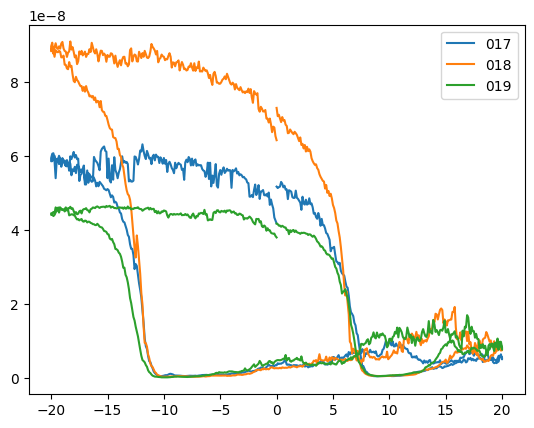

In [2]:
path_all = []
data = []
i = 0
j = 0


os.chdir(r"F:\Postdoc Montpellier 2022\Python projects\Postdoc UM 2022\data_vg")

file_name = "*.txt"

path_all.extend(list(glob(file_name)))

print(path_all)

while i<len(path_all):
#    tmp = (path_all[i][::-1]).index("\\")
    print("Index", i, "Now on data/sample:", path_all[i])#[-tmp:-4])
    data.append(np.loadtxt(path_all[i], skiprows=1))
    i+=1
#print(data)
print('***** loading done *****')
print(path_all)
print(len(path_all))

Vsd=0.01

I=[]
V=[]

for i in range(0, len(path_all)):
        #Datas recognizing   
    I.append(data[i][:,3]) 
    V.append(data[i][:,2]) 
    #plt.figure(figsize=(2, 1))   
    plt.plot(V[i],I[i], label=path_all[i][0:3])
    plt.legend()
plt.show()

In [3]:
#Conductance of NT after poly fitting(n times)_HOLES(Negative Voltage) side////////
#can use first branch for conductance if constant if not remove data//////////////
Negative_Ion=[]
V_on=[]
V_start=189                                                      #-20V
V_stop=199                                                      #-19V

voltage_g = []                                                 #nth element of the given list
current_d = []

for i in range(0, len(path_all)):     
    voltage_g.append(data[i][:,3])                             #x axis
    current_d.append(data[i][:,3])                             #y axis
    #print(voltage_g[i])
    #print(current_d[i])
    Negative_Ion.append(current_d[i])
    V_on.append(voltage_g[i])
    print("Conductance_from polyfit_Negative_first curve=", 1e9*(np.mean(Negative_Ion[i]))/Vsd, "nS") #Conductance in [nS] ///Attention Vsd has to be changed!!!!!!!!!!Conductance

Conductance_from polyfit_Negative_first curve= 2478.4627646201743 nS
Conductance_from polyfit_Negative_first curve= 3523.592154420922 nS
Conductance_from polyfit_Negative_first curve= 2095.8996263885433 nS


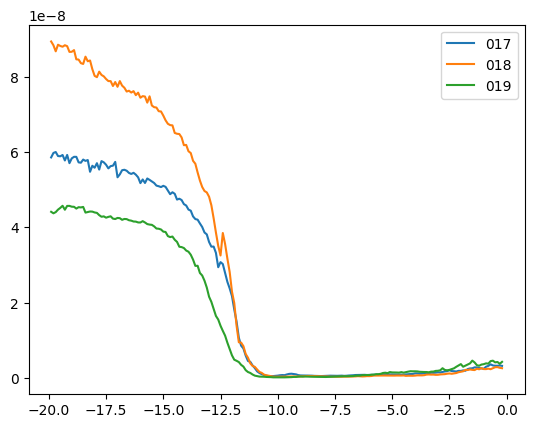

In [4]:
#Proton sides with hystheresis////////////////////////////////////////////////////
P1_start=202                #-20 to 0V  not accuarte after low pass filtering from 803 to 794
P1_stop= 400                #idx_negative[0]      #Vg- index
#Proton side
amp1 =-7
sigma1 =1
cen1 = -15

x1 = []
y1 = []

for i in range(0, len(path_all)):
    x1.append(V[i][P1_start:P1_stop])
    y1.append(I[i][P1_start:P1_stop])
    plt.plot(x1[i],y1[i],label=path_all[i][0:3])
    plt.legend()

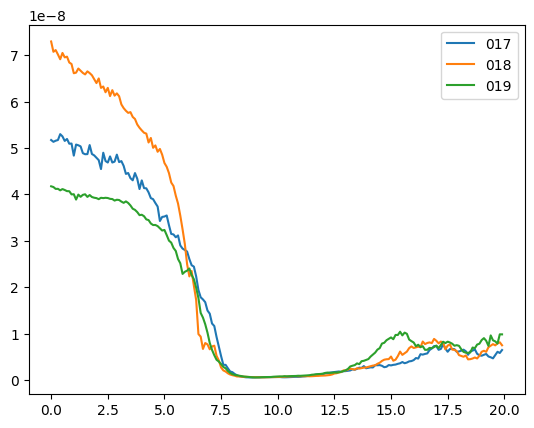

In [5]:
P2_start=603                #+20 to 0V return
P2_stop=803                   #idx_positive
#Proton hyst side
amp2 =-8.5
sigma2 =1
cen2 = 5

x2 = []
y2 = []

for i in range(0, len(path_all)):
    x2.append(V[i][P2_start:P2_stop])
    y2.append(I[i][P2_start:P2_stop])
    plt.plot(x2[i],y2[i],label=path_all[i][0:3])
    plt.legend()

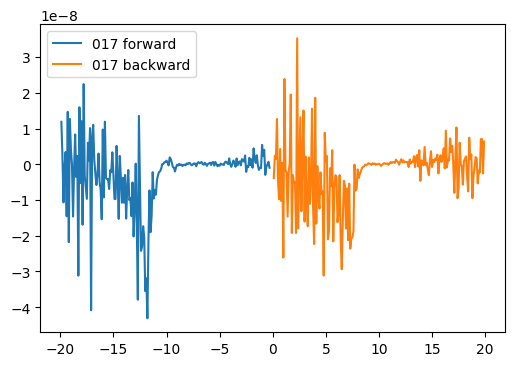

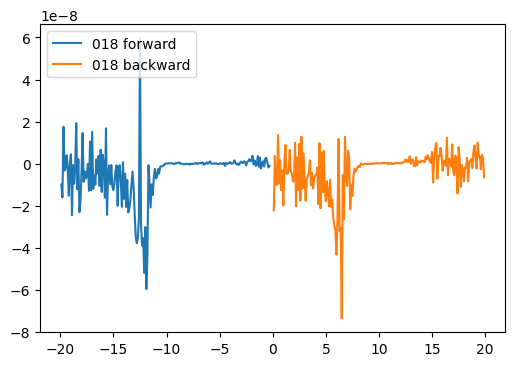

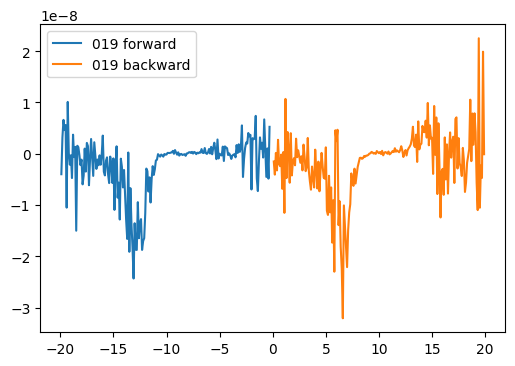

In [6]:
#Choose area from differential//////////////////////////////////////////////
#Plotting of derivative as it miss one symbol////////////////////////////////////
voltage_1 = []
current_1 = []

voltage_2 = []
current_2 = []

for i in range(0, len(path_all)):
    plt.figure(figsize=(6, 4))  
    voltage_1.append(np.diff(y1[i])/np.diff(x1[i]))
    current_1.append(np.array(x1[i][:-1]))
    plt.plot(current_1[i], voltage_1[i], label=path_all[i][0:3]+" forward")
    
    
    voltage_2.append(np.diff(y2[i])/np.diff(x2[i]))
    current_2.append(np.array(x2[i][:-1]))
    plt.plot(current_2[i], voltage_2[i], label=path_all[i][0:3]+" backward")
    plt.legend(loc="upper left")
    plt.show()


In [7]:
def _1gaussian(voltage, amp, cen, sigma):
    return amp*(1/(sigma*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((voltage-cen)/sigma)**2)))

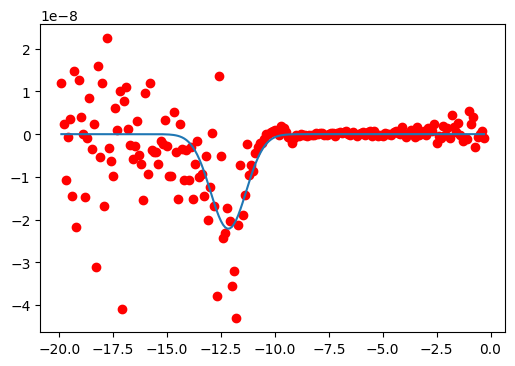

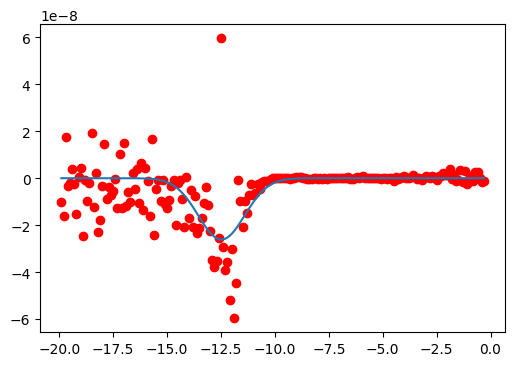

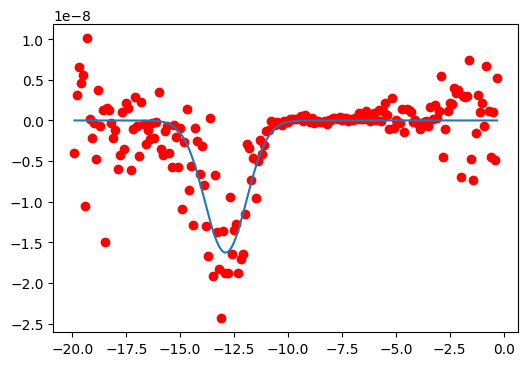

In [8]:
#Proton side
amp1 =-7
sigma1 =1
cen1 = -15

df1 = pd.DataFrame([])

for i in range(0, len(path_all)):
    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, current_1[i], voltage_1[i], p0=[amp1, cen1, sigma1])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    plt.figure(figsize=(6, 4)) 
    plt.plot(current_1[i], voltage_1[i], "ro")
    plt.plot(current_1[i], _1gaussian(current_1[i], *popt_gauss))
    
 
    data=pd.DataFrame(popt_gauss.reshape(-1, len(popt_gauss)), columns=['amplitude(nA)_forward', 'center(V)_forward', 'FHWM_forward'])
    data['amplitude(nA)_forward'] = (data['amplitude(nA)_forward']*1e9).round(3)
    data['center(V)_forward'] = (data['center(V)_forward']).round(3)
    data['FHWM_forward'] = (data['FHWM_forward']*2.35482).round(3)
    data.insert(0, "name_exp", path_all[i][0:3])
    data.insert(1, "Conductance(ns)", 1e9*(np.mean(Negative_Ion[i]))/Vsd)
    df1 = df1.append(data)  
    

In [9]:
df1.head(10)

,name_exp,Conductance(ns),amplitude(nA)_forward,center(V)_forward,FHWM_forward
0,017,2478.462765,-45.801,-12.159,1.942
0,018,3523.592154,-70.480,-12.477,2.535
0,019,2095.899626,-39.477,-12.895,2.280


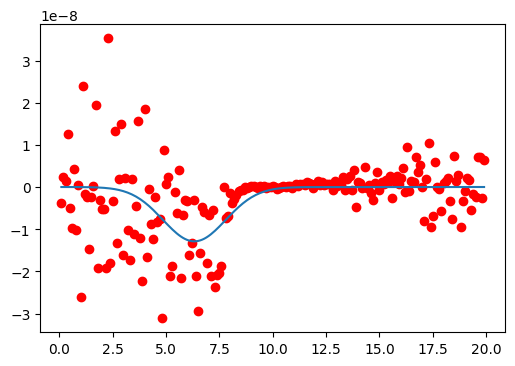

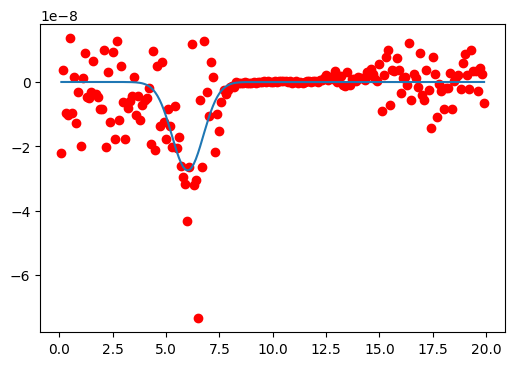

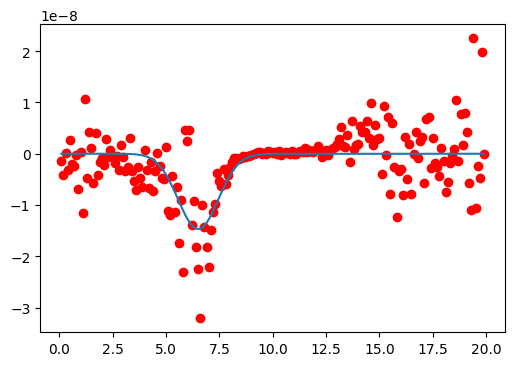

In [10]:
amp2 =-8.5
sigma2 =1
cen2 = 5

df2 = pd.DataFrame([])

for i in range(0, len(path_all)):
    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, current_2[i], voltage_2[i], p0=[amp2, cen2, sigma2])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    plt.figure(figsize=(6, 4)) 
    plt.plot(current_2[i], voltage_2[i], "ro")
    plt.plot(current_2[i], _1gaussian(current_2[i], *popt_gauss))
    
 
    data=pd.DataFrame(popt_gauss.reshape(-1, len(popt_gauss)), columns=['amplitude(nA)_backward', 'center(V)_backward', 'FHWM_backward'])
    data['amplitude(nA)_backward'] = (data['amplitude(nA)_backward']*1e9).round(3)
    data['center(V)_backward'] = (data['center(V)_backward']).round(3)
    data['FHWM_backward'] = (data['FHWM_backward']*2.35482).round(3)
    data.insert(0, "name_exp", path_all[i][0:3])
    df2 = df2.append(data)  

In [11]:
df2.head(10)

,name_exp,amplitude(nA)_backward,center(V)_backward,FHWM_backward
0,017,-47.371,6.331,3.455
0,018,-50.678,6.015,1.729
0,019,-34.698,6.511,2.219


In [12]:
df_full = pd.concat([df1, df2], axis=1)
df_full= df_full.reset_index()
df_full = df_full.drop('index', axis=1)
df_full['delta_Vg'] = df_full['center(V)_backward'] - df_full['center(V)_forward']
df_full.head()

,name_exp,Conductance(ns),amplitude(nA)_forward,center(V)_forward,FHWM_forward,name_exp,amplitude(nA)_backward,center(V)_backward,FHWM_backward,delta_Vg
0,017,2478.462765,-45.801,-12.159,1.942,017,-47.371,6.331,3.455,18.490
1,018,3523.592154,-70.480,-12.477,2.535,018,-50.678,6.015,1.729,18.492
2,019,2095.899626,-39.477,-12.895,2.280,019,-34.698,6.511,2.219,19.406


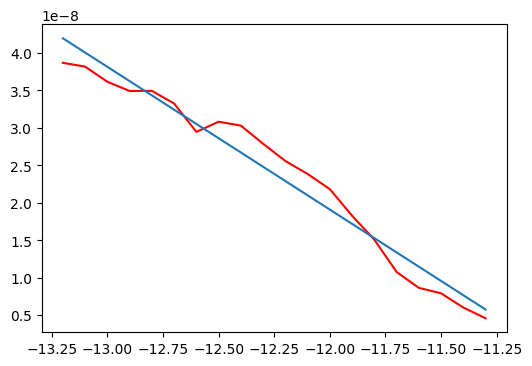

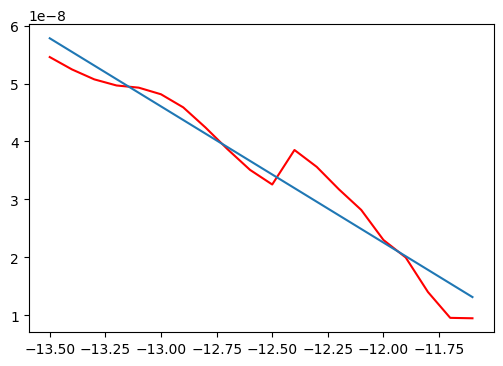

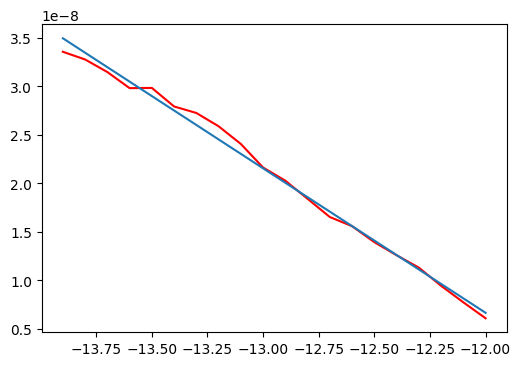

In [13]:
idx1 = []
k=10 
x1_linear = []
y1_linear = []

df3 = pd.DataFrame([])
for i in range(0, len(path_all)):
    idx1.append(pd.Series(abs(list(x1[i])-df1["center(V)_forward"].iloc[i])).idxmin())
    
    x1_linear.append(x1[i][idx1[i]-k:idx1[i]+k])
    y1_linear.append(y1[i][idx1[i]-k:idx1[i]+k])
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x1_linear[i],y1_linear[i])
    plt.figure(figsize=(6, 4)) 
    plt.plot(x1_linear[i],y1_linear[i],'r',label='P1 slope')
    plt.plot(x1_linear[i], slope*x1_linear[i] + intercept,label='P1 slope fit')
    
    data=pd.DataFrame(({'slope_forward':[slope*1e9], 'intercept_forward': [intercept],'std_err_forward': [std_err*1e9]}))
    data.insert(0, "name_exp", path_all[i][0:3])
    df3 = df3.append(data)


In [14]:
df3.head()

,name_exp,slope_forward,intercept_forward,std_err_forward
0,017,-19.053722,-2.095653e-07,0.890020
0,018,-23.528880,-2.598148e-07,1.347779
0,019,-14.905030,-1.722258e-07,0.280265


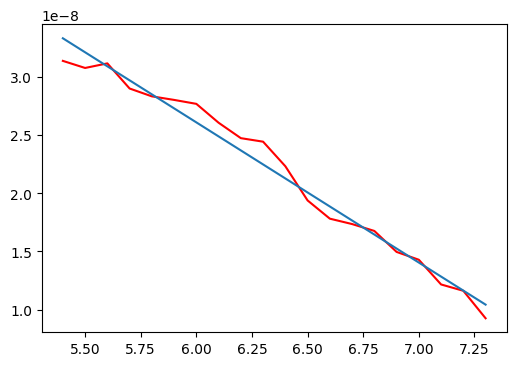

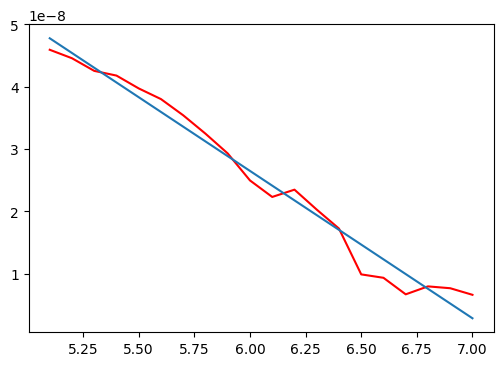

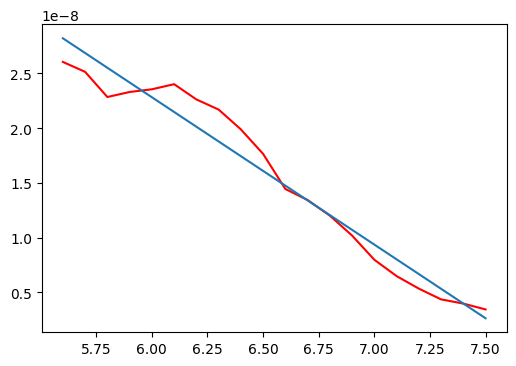

In [15]:
idx2 = []
k=10 
x2_linear = []
y2_linear = []

df4 = pd.DataFrame([])
for i in range(0, len(path_all)):
    idx2.append(pd.Series(abs(list(x2[i])-df2["center(V)_backward"].iloc[i])).idxmin())
    
    x2_linear.append(x2[i][idx2[i]-k:idx2[i]+k])
    y2_linear.append(y2[i][idx2[i]-k:idx2[i]+k])
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x2_linear[i],y2_linear[i])
    plt.figure(figsize=(6, 4)) 
    plt.plot(x2_linear[i],y2_linear[i],'r',label='P1 slope')
    plt.plot(x2_linear[i], slope*x2_linear[i] + intercept,label='P1 slope fit')
    
    data=pd.DataFrame(({'slope_backward':[slope*1e9], 'intercept_backward': [intercept],'std_err_backward': [std_err*1e9]}))
    data.insert(0, "name_exp", path_all[i][0:3])
    df4 = df4.append(data)

In [16]:
df4.head()

,name_exp,slope_backward,intercept_backward,std_err_backward
0,017,-12.036699,9.829439e-08,0.412266
0,018,-23.653023,1.684035e-07,0.861977
0,019,-13.474045,1.036704e-07,0.669692


In [17]:
df_full = pd.concat([df3, df4], axis=1)
df_full= df_full.reset_index()
df_full = df_full.drop('index', axis=1)
df_full.head()

,name_exp,slope_forward,intercept_forward,std_err_forward,name_exp,slope_backward,intercept_backward,std_err_backward
0,017,-19.053722,-2.095653e-07,0.890020,017,-12.036699,9.829439e-08,0.412266
1,018,-23.528880,-2.598148e-07,1.347779,018,-23.653023,1.684035e-07,0.861977
2,019,-14.905030,-1.722258e-07,0.280265,019,-13.474045,1.036704e-07,0.669692
